# Dummy example

In [5]:
import gudhi
import numpy as np
import matplotlib.pyplot as plt

import torch.nn as nn
import torch

from gudhi.wasserstein import wasserstein_distance
from torch.optim.lr_scheduler import LambdaLR

In [6]:
def wasserstein_based_loss(features_1, features_2):
    rips = gudhi.RipsComplex(points=features_1, max_edge_length=0.5)
    rips_1 = gudhi.RipsComplex(points=features_2, max_edge_length=0.5)
    # for the first Point cloud
    st = rips.create_simplex_tree(max_dimension=2)
    st.compute_persistence()
    i = st.flag_persistence_generators()
    if len(i[1]) > 0:
        i1 = torch.tensor(i[1][0])  # pytorch sometimes interprets it as a tuple otherwise
    else:
        i1 = torch.empty((0, 4), dtype=int)
    # for the seconds Point cloud
    st_1 = rips_1.create_simplex_tree(max_dimension=2)
    st_1.compute_persistence()
    i_1 = st_1.flag_persistence_generators()
    if len(i_1[1]) > 0:
        i1_1 = torch.tensor(i_1[1][0])
    else:
        i1_1 = torch.empty((0, 4), dtype=int)
        
    # Same as the finite part of st.persistence_intervals_in_dimension(1), but differentiable
    diag = torch.norm(features_1[i1[:, (0, 2)]] - features_1[i1[:, (1, 3)]], dim=-1)
    diag1 = torch.norm(features_2[i1_1[:, (0, 2)]] - features_2[i1_1[:, (1, 3)]], dim=-1)

    
    wasser = wasserstein_distance(diag, 
                                  diag1, 
                                  order=1, 
                                  enable_autodiff=True)
    print("wasser", wasser)
    return wasser


In [7]:
network = nn.Sequential(
    nn.Linear(200, 10),
    nn.ReLU(),)


wasser tensor(0.1083, grad_fn=<SumBackward0>)


/home/jmordacq/miniconda3/envs/difftda/lib/python3.9/site-packages/gudhi/wasserstein/wasserstein.py:282: UserWarning: enable_autodiff=True and keep_essential_parts=True are incompatible together.
                      keep_essential_parts is set to False: only points with finite coordinates are considered
                      in the following.
                      
  warnings.warn('''enable_autodiff=True and keep_essential_parts=True are incompatible together.


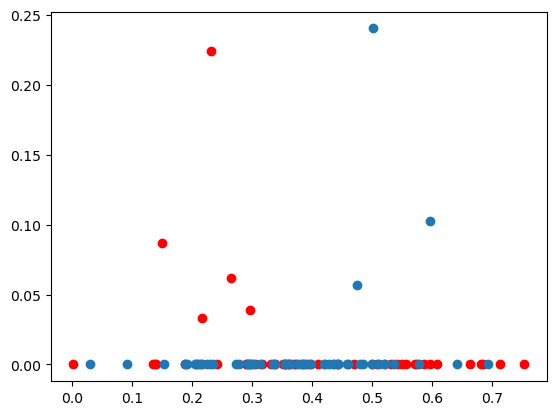

wasser tensor(0.0777, grad_fn=<SumBackward0>)
wasser tensor(0.1053, grad_fn=<SumBackward0>)


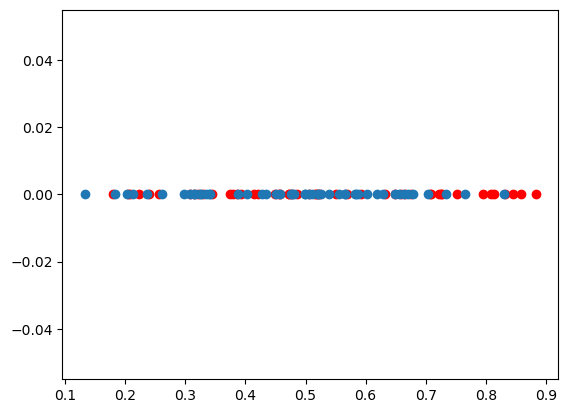

wasser tensor(0.1478, grad_fn=<SumBackward0>)
wasser tensor(0.1007, grad_fn=<SumBackward0>)


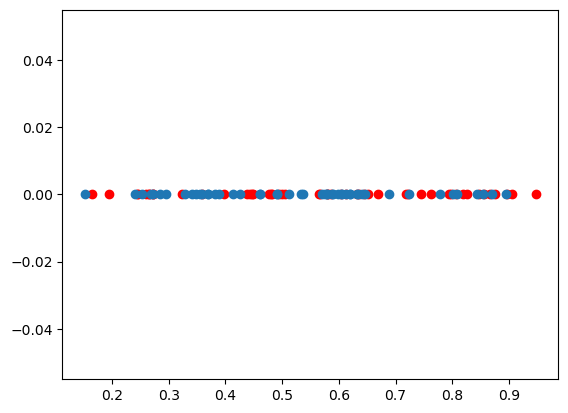

wasser tensor(0.1230, grad_fn=<SumBackward0>)
wasser tensor(0.1390, grad_fn=<SumBackward0>)


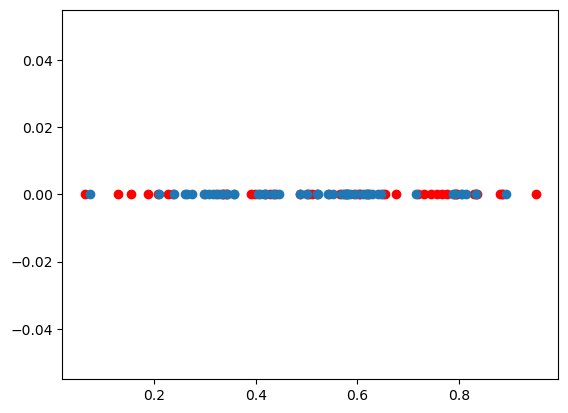

wasser tensor(0.1175, grad_fn=<SumBackward0>)
wasser tensor(0.1217, grad_fn=<SumBackward0>)


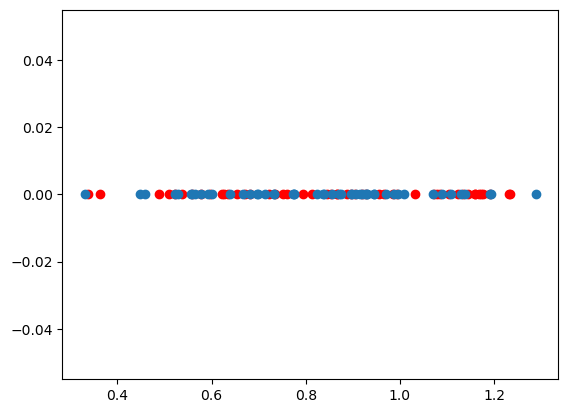

wasser tensor(0.1260, grad_fn=<SumBackward0>)
wasser tensor(0.1545, grad_fn=<SumBackward0>)


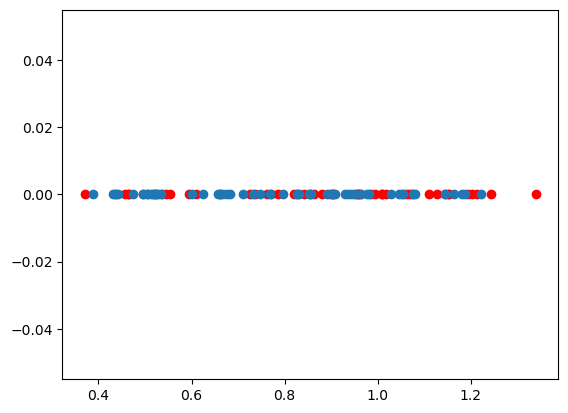

wasser tensor(0.1281, grad_fn=<SumBackward0>)
wasser tensor(0.1414, grad_fn=<SumBackward0>)


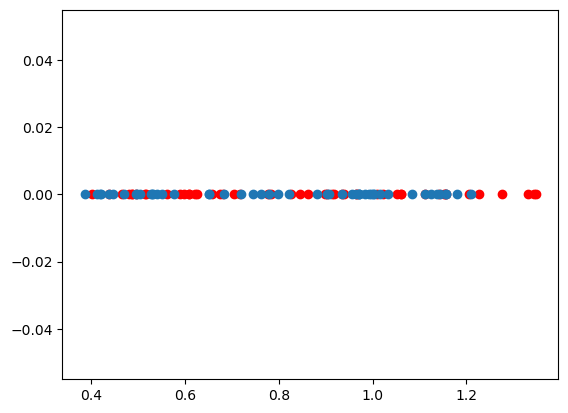

wasser tensor(0.0669, grad_fn=<SumBackward0>)
wasser tensor(0.1702, grad_fn=<SumBackward0>)


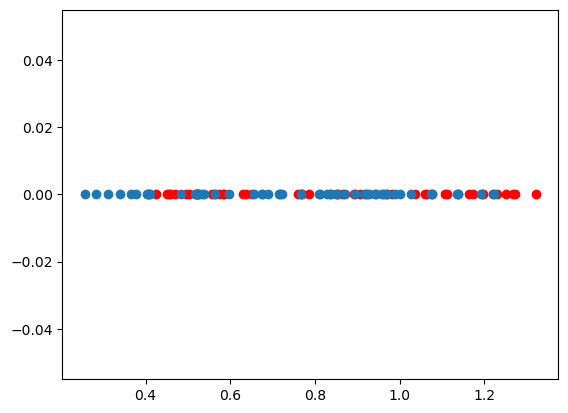

wasser tensor(0.1630, grad_fn=<SumBackward0>)
wasser tensor(0.1078, grad_fn=<SumBackward0>)


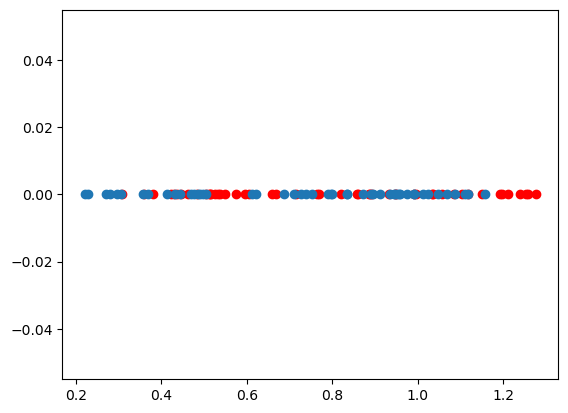

wasser tensor(0.1635, grad_fn=<SumBackward0>)
wasser tensor(0.1656, grad_fn=<SumBackward0>)


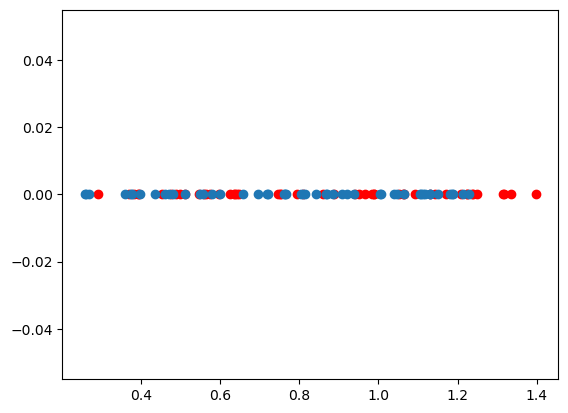

wasser tensor(0.1564, grad_fn=<SumBackward0>)


In [8]:
X = torch.tensor(np.random.rand(50, 200), dtype=torch.float32)
Y = torch.tensor(np.random.rand(50, 200), dtype=torch.float32)

losses = []
# learn a latent space where the Wasserstein distance is minimized between the two point clouds

opt = torch.optim.SGD(network.parameters(), lr=0.01)
# scheduler = LambdaLR(opt,[lambda epoch: 10./(10+epoch)])
for idx in range(20):
    view_1 = network(X)
    view_2 = network(Y)
    opt.zero_grad()
    loss = wasserstein_based_loss(view_1, view_2)
    loss.backward()
    losses.append(loss.item())
    opt.step()
    # Draw every 100 epochs
    if idx % 2 == 0:
        latent_X = view_1.detach().numpy()
        latent_Y = view_2.detach().numpy()
        plt.scatter(latent_X[:, 0], latent_X[:, 1], c="r")
        plt.scatter(latent_Y[:, 0], latent_Y[:, 1])
        plt.show()


Text(0.5, 1.0, 'Wasserstein loss on persistence diagrams in the latent space')

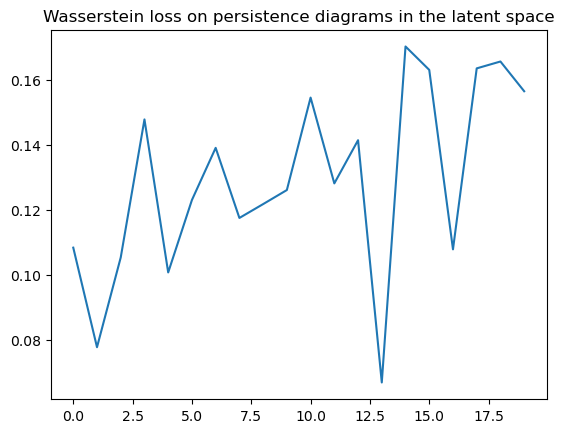

In [9]:
plt.plot(losses)
plt.title("Wasserstein loss on persistence diagrams in the latent space")